In [1]:
# nltk.download('averaged_perceptron_tagger_eng')

# nltk.download('punkt')    # Use nltk downloader to download resource "punkt"
# nltk.download('punkt_tab')

# %pip install syllapy


## Import libraries, packages, and modules

In [3]:
# import libraries, packages, modules

import string
import math
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import nltk
import syllapy as syl
from nltk.tokenize import word_tokenize



## File handling

In [5]:
# Define a function for file handling

def process_file(file):
    """ Takes a .txt file as an argument and returns a string object."""
    txt_test = ""
    input_fd = open(file, "r", errors='ignore')
    for line_str in input_fd:
        line_str = line_str.strip() # remove the carriage return
        txt_test += " "
        txt_test += line_str
    input_fd.close()
    return txt_test


## Text-level feature extraction

In [7]:
# Defining functions to get features from the string object
# Note: nltk tokenizer counts sentence-boundaries as tokens. The following functions do not.

def get_tokens(text):
    """Takes a string as an argument, returns a list of lower-case words.
    Contractions are included as words."""
    translator = str.maketrans('', '', ".!?,;:")
    stripped = text.translate(translator) # removes punctuation
    lower_words = stripped.lower() # converts all alpha characters to lowercase
    tokens = lower_words.split() # splits on whitespace
    return tokens

def get_types(tokens):
    types = set(tokens) # creates a set of unique words
    return types

def count_tokens(text):
    """Takes a string as an argument, returns the number of total words."""
    tokens = get_tokens(text)
    token_ct = len(tokens) # counts total words
    return token_ct

# functions for counting characters and syllables

def count_char(tokens):
    """Takes a list of words as an argument. Returns the total number of characters in the words."""
    char_ct = 0
    for token in tokens:
        for char in token:
            char_ct += 1
    return char_ct

# def count_types(text):
#     """Takes a string as an argument, returns the count of unique words."""
#     words = get_tokens(text)
#     types = set(words) # creates a set of unique words
#     type_ct = len(types) # counts length of type set
#     return type_ct

def avg_token_len(text):
    """Take a string as an argument. Return the average length of a token in characters."""
    tokens = get_tokens(text)
    char_ct = count_char(tokens)
    avg_token_len = char_ct / len(tokens)
    return avg_token_len

def get_syllables(text):
    """Take a string as an argument. Return the total syllable count of the text."""
    tokens = get_tokens(text)
    syllable_ct = 0
    for token in tokens:
        syllable_ct += syl.count(token)
    return syllable_ct

# def tokens_and_types(text):
#     """Takes a string as an argument, and returns the counts of tokens and types."""
#     tokens = get_tokens(text)
#     token_ct = len(tokens) # counts total words
#     types = set(tokens) # creates a set of unique words
#     type_ct = len(types) # counts length of type set
#     return token_ct, type_ct

# def get_ttr(text):
#     """Counts tokens and types, returns type-to-token ratio."""
#     token_ct, type_ct = tokens_and_types(text)
#     ttr = (type_ct / token_ct)
#     return ttr

def print_ttr(text):
    """Counts tokens and types, returns a formatted string with type-to-token ratio."""
    token_ct, type_ct = tokens_and_types(text)
    ttr = (type_ct / token_ct)
    output_str = f"Input string has {token_ct} tokens, {type_ct} types, and a type-to-token ratio of {ttr:.3f}"
    return output_str



## Sentence-level feature extraction

In [9]:

def break_sentences(text):
    """Takes a string as an argument, returns a list of sentences."""
    sentences = nltk.sent_tokenize(text)
    return sentences

def sentence_count(text):
    """Takes a string as an argument, returns the number of sentences in the string."""
    sentences = break_sentences(text)
    return len(sentences)

def avg_sent_length(text):
    """Takes a string as an argument, returns the average length of the sentences in the string."""
    sentence_ct = sentence_count(text)
    word_ct = count_tokens(text)
    asl = word_ct / sentence_ct
    return asl

def max_sent_length(text):
    """Takes a string as an argument, returns the length of the longest sentence in the string."""
    sentences = break_sentences(text)
    max_length = 0
    for sentence in sentences:
        sent_length = 0
        my_tokens = get_tokens(sentence)
        sent_length = len(my_tokens)
        if sent_length > max_length:
            max_length = sent_length
    return max_length

## Functions to get POS-tagging Features

In [11]:
# define functions to tag POS with nltk
# and to get features related to POS categories

def get_pos_dict(text):
    """A function to return a dictionary containing the number of instances of each pos category in a text."""
    tag_ct_dict = {}
    sents = break_sentences(text) # get sentences
    for sent in sents:
        tokens = get_tokens(sent)
        tagged_tokens = nltk.pos_tag(tokens)
        for token, tag in tagged_tokens:
            if tag in tag_ct_dict:
              tag_ct_dict[tag] +=1
            else:
              tag_ct_dict[tag] = 1
    return tag_ct_dict

def pos_total_cats(my_dict):
    """Takes a dictionary as an argument. Returns the length of the dictionary."""
    pos_cat_count = len(my_dict) # simply counts how many different POS categories are present in the text
    return pos_cat_count

def tag_in_text(tag, my_dict):
    """This function takes two arguments - a particular tag, and the extracted POS dictionary of the text.
    Returns the count of the tag"""
    if tag in my_dict.keys():
        ct = my_dict.get(tag)
        return ct
    else:
        return 0

def get_full_dict(my_dict):
    """Takes the dictionary directly extracted by the POS tagger and returns a 'full' dictionary.
    * Important! *
    This function relies on the tag_in_text function."""
    penn_tags_list = ['CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', \
                      'LS', 'MD', 'NN', 'NNS', 'NNP', 'NNPS', 'PDT', 'POS', 'PRP', \
                      'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', \
                      'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB']
    full_dict = {}
    for tag in penn_tags_list:
        ct = tag_in_text(tag, my_dict)
        full_dict.update({tag : ct})
    return full_dict

def get_cat_dicts(full_dict):
    """This function returns the broad category counts.
    Takes the 'full' dictionary as an argument and returns summed tallies of general pos categories."""
    jj_dict = dict(filter(lambda item: "JJ" in item[0], full_dict.items()))
    nn_dict = dict(filter(lambda item: "NN" in item[0], full_dict.items()))
    prp_dict = dict(filter(lambda item: "PRP" in item[0], full_dict.items()))
    rb_dict = dict(filter(lambda item: "RB" in item[0], full_dict.items()))
    vb_dict = dict(filter(lambda item: "VB" in item[0], full_dict.items()))
    cpx_list = ['CC', 'IN', 'MD', 'TO', 'WDT', 'WP', 'WP$', 'WRB']
    cpx_dict = {}
    for tag in cpx_list:
        ct = tag_in_text(tag, full_dict)
        cpx_dict.update({tag : ct})
    return jj_dict, nn_dict, prp_dict, rb_dict, vb_dict, cpx_dict

def get_dict_value_ct(my_dict):
    ct = 0
    for key in my_dict.keys():
        if my_dict.get(key) != 0:
            ct += 1
    return ct
    
def get_dict_value_sum(my_dict):
    sum = 0
    for key in my_dict.keys():
        sum += my_dict.get(key)
    return sum
    

## Extracting Academic and General Service Word List Features ##

In [13]:
""" This cell reads the csv file with the academic word list into a dictionary. """

import csv

my_acad_dict = {}
with open('eap_asl.csv', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        my_acad_dict.update({row[0]:row[1]})
csvfile.close()


In [14]:
# This cell has two functions to handle academic vocabulary in the text.

def acad_ct(my_list, acad_dict):
    """This function counts how many academic words are present in a list."""
    acad_ct = 0
    for item in my_list:
        if item in acad_dict.keys():
            acad_ct += 1
    return acad_ct

def acad_in_list(my_list, acad_dict):
    """This function returns a list of academic words which appear in the list.
    Will work the same whether the list argument is the types or the tokens of a given text.
    The academic word list has both head-words and inflected forms,
    This version of the function returns only the head-word."""
    output_list = []
    for item in my_list:
        if item in acad_dict.keys():
            output_list.append(acad_dict.get(item))
    output_set = set(output_list)
    return sorted(output_set)


In [15]:
test_string = "I enjoy the processes of texting and text processing!"

test_list = get_tokens(test_string)

sample_list = acad_in_list(test_list, my_acad_dict)
print(sample_list)

# prints the head-word only

['process', 'text']


In [16]:
# This cell loads the "general service" word list

import csv

my_gsl_dict = {}
"""This block of code imports the general service list.
Each word has an integer frequency value. Higher values indicate
more frequent (common) words. """
with open('gsl_final.csv', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        my_gsl_dict.update({row[0]:row[1]})
csvfile.close()

In [17]:
# This cell contains two functions which get features related to the general service word list

def gsl_simple_ct(my_list, gsl_dict):
    """Return a simple count of how many list items are in the gsl."""
    gsl_ct = 0
    for item in my_list:
        if item in gsl_dict.keys():
            gsl_ct += 1
    return gsl_ct

def get_gsl_freq(my_list, gsl_dict):
    """This function gets the relative frequency of the items in the list.
    It takes two arguments: a list and a dictionary.
    Returns an integer value, the sum of the frequency values for each item.
   """
    gsl_freq_sum = 0
    for item in my_list:
        if item in gsl_dict.keys():
            gsl_freq_sum += (int(gsl_dict.get(item)))
    return gsl_freq_sum


In [18]:
# # Testing awl and gsl functions

# my_text = process_file("test.txt")
# my_tokens = get_tokens(my_text)
# my_types = get_types(my_tokens)
# my_type_ct = len(my_types)

# output_str = print_ttr(my_text)
# print(output_str)

# acad_types = acad_ct(my_types, my_acad_dict)
# print("There are", acad_types, "academic words in the types.")
# acad_pct = acad_types / my_type_ct
# print("Percent of types in academic word list:", acad_pct)

# acad_list = acad_in_list(my_types, my_acad_dict)
# print(acad_list)

# gsl_type_ct = gsl_simple_ct(my_types, my_gsl_dict)
# print("There are", gsl_type_ct, "general service words in the types.")

# gsl_type_freq = get_gsl_freq(my_types, my_gsl_dict)

# gsl_freq = gsl_type_freq / my_type_ct
# print("Relative frequency of types in general service list:", gsl_freq)

# # print(my_types)

In [19]:
# This cell loads the frequency values of the Longman 3000
# Double weight is given to the written corpus

import csv

longman_dict = {}
"""This block of code imports the Longman 3000.
Each word has an integer frequency value. Higher values indicate
more frequent (common) words. """
with open('longman_final.csv', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    for row in csvreader:
        longman_dict.update({row[0]:row[1]})
csvfile.close()


In [20]:
# This cell definges a function to get the feature related to longman frequency values

def get_longman_freq(my_list, longman_dict):
    longman_freq_sum = 0
    for item in my_list:
        if item in longman_dict.keys():
            longman_freq_sum += (int(longman_dict.get(item)))
    return longman_freq_sum

## Extracting Cognate Features ##

In [22]:
""" This cell reads the csv file with the cognates and loads them into a dictionary. """

en_es_dict = {}
en_fr_dict = {}
en_ht_dict = {}
en_por_dict = {}

import csv

with open('cognates_final.csv', newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile, restval='xxx')
    for row in reader:
        if row['Spanish'] != 'xxx':
            es_cognate = row['Spanish']
            if len(es_cognate) > 2:
                en_es_dict.update({row['English'] : es_cognate})
        if row['French'] != 'xxx':
            fr_cognate = row['French']
            if len(fr_cognate) > 2:
                en_fr_dict.update({row['English'] : fr_cognate})
        if row['Haitian Creole'] != 'xxx':
            ht_cognate = row['Haitian Creole']
            if len(ht_cognate) > 2:
                en_ht_dict.update({row['English'] : ht_cognate})
        if row['Portuguese'] != 'xxx':
            por_cognate = row['Portuguese']
            if len(por_cognate) > 2:
                en_por_dict.update({row['English'] : por_cognate})
csvfile.close()


In [23]:
# Getting cognate values as features

def get_cognate_token_pct(text, cognate_dict):
    """Given a text and cognate dictionary as arguments, this function returns the percentage of TOKENS that are cognates
    with that L1."""
    tokens = get_tokens(text)
    token_ct = 0
    cognate_ct = 0
    for token in tokens:
        token_ct += 1
        if token in cognate_dict.keys():
            cognate_ct += 1
    return cognate_ct / token_ct

def get_cognate_type_pct(text, cognate_dict):
    """Given a text and cognate dictionary as arguments, this function returns the percentage of TYPES that are cognates
    with that L1."""
    tokens = get_tokens(text)
    types = get_types(tokens)
    type_ct = 0
    cognate_ct = 0
    for my_type in types:
        type_ct += 1
        if my_type in cognate_dict.keys():
            cognate_ct += 1
    return cognate_ct / type_ct

def get_cognate_pct(my_list, cognate_dict):
    """Here the idea is to use a more versatile function that will work on either the tokens or the types."""
    item_ct = 0
    cognate_ct = 0
    for item in my_list:
        item_ct += 1
        if item in cognate_dict.keys():
            cognate_ct += 1
    return cognate_ct / item_ct

def get_cognate_list(text, cognate_dict):
    """This function takes a text and cognate dictionary as arguments, returns a list of the cognates in the text."""
    tokens = get_tokens(text)
    types = get_types(tokens)
    my_cognate_list = []
    for my_type in types:
        if my_type in cognate_dict.keys():
            baby_list = [my_type, cognate_dict.get(my_type)]
            my_cognate_list.append(baby_list)
    return my_cognate_list

In [24]:
# # testing the output of the cognate functions

# my_text = process_file("test.txt")

# my_tokens = get_tokens(my_text)
# my_types = get_types(my_tokens)

# my_wonderful_list = get_cognate_list(my_text, en_es_dict)
# cognate_token_pct = get_cognate_pct(my_tokens, en_es_dict)
# cognate_type_pct = get_cognate_pct(my_types, en_es_dict)

# # cognate_token_pct = get_cognate_token_pct(my_text, en_es_dict)
# # cognate_type_pct = get_cognate_type_pct(my_text, en_es_dict)

# print("Percentage of cognates in the tokens:", cognate_token_pct)
# print("Percentage of cognates in the types:", cognate_type_pct)

# print(my_wonderful_list)

## Legacy Readability Formula Features

In [26]:
# legacy readability indices
# these two use sentences, word count, and syllables

def flesch_kincaid(text):
    sent_ct = sentence_count(text)
    tokens = get_tokens(text)
    word_ct = len(tokens)
    syllable_ct = get_syllables(text)
    fkre = 206.835 - 1.015*(word_ct / sent_ct) - 84.6*(syllable_ct / word_ct)
    if fkre > 0:
        return fkre
    else:
        return 0
 
def gunning_fog(text):
    sent_ct = sentence_count(text)
    tokens = get_tokens(text)
    word_ct = len(tokens)
    complex_ct = 0
    for token in tokens:
        syllable = syl.count(token)
        if syllable > 2:
            complex_ct +=1
    gf_index = 0.4*((word_ct / sent_ct) + 100*(complex_ct / word_ct))
    if gf_index > 0:
        return gf_index
    else:
        return 0

# I wrote the following function because it's an interesting index
# However, not workable because it requires 30 sentences. Many samples are shorter than that.

# def smog(text):
#     poly_ct = 0
#     tokens = get_tokens(text)
#     for token in tokens:
#         syllable = syl.count(token)
#         if syllable > 2:
#             poly_ct += 1
#     smog_index = math.sqrt(poly_ct) + 3
#     return smog_index

# these two use sentences, word count, and characters

def get_ari(text):
    """This one is called the automated readability index. Military, 1960s."""
    sent_ct = sentence_count(text)
    tokens = get_tokens(text)
    word_ct = len(tokens)
    char_ct = count_char(tokens)
    ari = 4.71*(char_ct / word_ct) + 0.5*(word_ct / sent_ct) - 21.43
    if ari > 0:
        return ari
    else:
        return 0

def coleman_liau(text):
    """The Coleman-Liau Formula is based on total characters per 100 words, sentences per 100 words, and a constant."""
    sent_ct = sentence_count(text)
    tokens = get_tokens(text)
    word_ct = len(tokens)
    char_ct = count_char(tokens)
    coleman_liau = 5.88*(char_ct / word_ct) - 29.6*(sent_ct / word_ct) - 15.8
    if coleman_liau > 0:
        return coleman_liau
    else:
        return 0


In [27]:
# Test legacy readability formulas

# my_text = "Life on the Road My wife and I don’t live in a house. We don't live in an apartment. We live in a recreational vehicle, an RV. \
# We live in one long room. It is 26 feet long. In the front, we have two comfortable chairs. There is a small kitchen with a sink, a refrigerator, and a stove. There is a big window in the kitchen area. On the other side, there is a sofa and a large table. We eat and use our laptops on the table. The TV is on the wall next to the sofa. Our bedroom is behind the kitchen. There is a big closet for our clothes. In the back of the RV, there is a small bathroom with a shower. \
# We drive all over the United States. We don't like cold weather. When it is cold, we drive south to states like Florida, Texas, or Arizona. When it is hot, we drive north to states like Michigan, Vermont, or Maine. We drive about 20,000 miles each year. We stop and visit many different places. At night, we stay in RV parks. Sometimes we stay for a week. Sometimes we stay for a month. We have a lot of friends in these parks. We sit, talk, and cook outside. \
# It is easy to visit family with an RV. We have three children, and we visit them two or three times a year. I have two sisters, and my wife has a brother. We visit them every year, too. "

# fkre = flesch_kincaid(my_text)
# gf = gunning_fog(my_text)
# ari = get_ari(my_text)
# cl = coleman_liau(my_text)

# print("Flesch Kincaid Reading Ease:", fkre)
# print("Gunning Fog Index:", gf)
# print("Automated Readability Index:", ari)
# print("Coleman Liau Formula:", cl)

# my_tokens = get_tokens(my_text)
# for token in my_tokens:
#     print(token, syl.count(token))


## Extract Features and create arrays

In [29]:
# Using the functions above, create a 'list of lists' object containing features for each document.

def get_features(text, L1_val="es"):
    """Takes a long string as an argument, and returns a list of x features:
       """
    feature_list = [] # initialize list object to receive features
    # text = process_file(doc) # get the txt file as a string
    
    tokens = get_tokens(text)
    types = get_types(tokens)
    sentences = break_sentences(text)
    
    # get 6 basic features

    token_ct = len(tokens)
    type_ct = len(types)
    # token_ct, type_ct = tokens_and_types(text) # get token and type counts
    ttr = (type_ct / token_ct) # get type-to-token ratio
    sent_ct = sentence_count(text) # get sentence count
    asl = avg_sent_length(text) # get average sentence length
    # max_sl = max_sent_length(text) # get max sentence length

    # add 6 basic features
    
    # add feature token count
    feature_list.append(token_ct)
    # add feature type count
    feature_list.append(type_ct)
    # add feature ttr
    feature_list.append(ttr)
    # add feature sentence count
    feature_list.append(sent_ct)
    # add feature average sentence length
    feature_list.append(asl)
    # add feature max sentence length
    # feature_list.append(max_sl)    
    
    # get pos dictionaries

    my_dict = get_pos_dict(text)
    full_dict = get_full_dict(my_dict)
    jj_dict, nn_dict, prp_dict, rb_dict, vb_dict, cpx_dict = get_cat_dicts(full_dict)

    # Use this dict to select features from full_dict of pos features
    pos_light_switch = {'CC': 1, 'CD': 1, 'DT': 1, 'EX': 1, 'FW': 0, 'IN': 1, 'JJ': 1, 'JJR': 1, 'JJS': 1, \
                      'LS': 0, 'MD': 1, 'NN': 1, 'NNS': 1, 'NNP': 0, 'NNPS': 0, 'PDT': 0, 'POS': 0, 'PRP': 1, \
                      'PRP$': 0, 'RB': 1, 'RBR': 0, 'RBS': 0, 'RP': 1, 'SYM': 0, 'TO': 1, 'UH': 0, \
                      'VB': 1, 'VBD': 1, 'VBG': 1, 'VBN': 1, 'VBP': 1, 'VBZ': 0, 'WDT': 0, 'WP': 0, 'WP$': 0, 'WRB': 0}
    
    # get and append up to 36 pos counts as features
    for key in full_dict.keys():
        my_int = full_dict.get(key)
        if pos_light_switch.get(key) == 1: # this line allows some but not all POS cats to be used as features, see above
            feature_list.append(my_int)

   
    # get and append up to 20 aggregate pos features
    pos_total_ct = get_dict_value_ct(full_dict) # number of syntactic categories present in the text
    pos_total_ps = pos_total_ct / sent_ct # divided by the number of sentences
    jj_total_ct = get_dict_value_ct(jj_dict) # number of adjective categories present in the text
    jj_total_sum = get_dict_value_sum(jj_dict) # number of total adjectives present in the text
    jj_density = jj_total_sum / token_ct
    nn_total_ct = get_dict_value_ct(nn_dict) # number of noun categories present in the text
    nn_total_sum = get_dict_value_sum(nn_dict) # number of total nouns present in the text
    nn_density = nn_total_sum / token_ct
    prp_total_ct = get_dict_value_ct(prp_dict) # number of pronoun categories present in the text
    prp_total_sum = get_dict_value_sum(prp_dict) # number of total pronouns present in the text
    prp_density = prp_total_sum / token_ct
    rb_total_ct = get_dict_value_ct(rb_dict) # number of adverb categories present in the text
    rb_total_sum = get_dict_value_sum(rb_dict) # number of total adverbs present in the text
    rb_density = rb_total_sum / token_ct
    vb_total_ct = get_dict_value_ct(vb_dict) # number of verb categories present in the text
    vb_total_sum = get_dict_value_sum(rb_dict) # number of total verbs present in the text
    vb_density = vb_total_sum / token_ct
    cpx_ct = get_dict_value_ct(cpx_dict) # number of 'complex' categories present in the text
    cpx_sum = get_dict_value_sum(cpx_dict) # number of total 'complex' funtion words present in the text
    cpx_density = cpx_sum / token_ct

    # add 20 aggregate pos features
    feature_list.append(pos_total_ct)
    feature_list.append(pos_total_ps)
    feature_list.append(jj_total_ct)
    # feature_list.append(jj_total_sum)
    feature_list.append(jj_density)
    feature_list.append(nn_total_ct)
    # feature_list.append(nn_total_sum)
    feature_list.append(nn_density)
    feature_list.append(prp_total_ct)
    # feature_list.append(prp_total_sum)
    feature_list.append(prp_density)
    feature_list.append(rb_total_ct)
    # feature_list.append(rb_total_sum)
    feature_list.append(rb_density)
    feature_list.append(vb_total_ct)
    # feature_list.append(vb_total_sum)
    feature_list.append(vb_density)
    feature_list.append(cpx_ct)
    # feature_list.append(cpx_sum)
    feature_list.append(cpx_density)

    # get cognate feature
    # L1 is an argument, default = es

    language_codes = {"es": "Spanish", "fr": "French", "ht": "Haitian Creole", "por": "Portuguese"}
    cognate_dictionaries = {"es": en_es_dict, "fr": en_fr_dict, "ht": en_ht_dict, "por": en_por_dict}
    cognate_dict = cognate_dictionaries.get(L1_val)

    cognate_token_pct = get_cognate_pct(tokens, cognate_dict)
    cognate_type_pct = get_cognate_pct(types, cognate_dict)
    
    feature_list.append(cognate_token_pct)
    feature_list.append(cognate_type_pct)
    
    # get legacy readability indices:

    fkre = flesch_kincaid(text)
    gf = gunning_fog(text)
    ari = get_ari(text)
    cl = coleman_liau(text)

    feature_list.append(fkre)
    feature_list.append(gf)
    feature_list.append(ari)
    feature_list.append(cl)
    
    # get and append 4 'general service list' word frequency features

    gsl_token_ct = gsl_simple_ct(tokens, my_gsl_dict)
    gsl_type_ct = gsl_simple_ct(types, my_gsl_dict)
    gsl_token_freq = get_gsl_freq(tokens, my_gsl_dict)
    gsl_type_freq = get_gsl_freq(types, my_gsl_dict)

    gsl_pct_tokens = gsl_token_ct / token_ct
    gsl_pct_types = gsl_type_ct / type_ct
    gsl_dfreq_tokens = gsl_token_freq / token_ct
    gsl_dfreq_types = gsl_type_freq / type_ct
    
    # gsl_sum_tokens = get_gsl_sum_tokens(tokens, my_gsl_dict, my_gsl_ct_dict)
    # gsl_sum_types = get_gsl_sum_types(types, my_gsl_dict, my_gsl_ct_dict)
    # gsl_d_tokens = get_gsl_density_tokens(gsl_sum_tokens, token_ct)
    # log_gsl_d_tokens = get_log_gsl_dens_tokens(gsl_sum_tokens, token_ct)
    # gsl_d_types = get_gsl_density_types(gsl_sum_types, type_ct)
    # log_gsl_d_types = get_log_gsl_dens_types(gsl_sum_types, type_ct)

    feature_list.append(gsl_pct_tokens)
    feature_list.append(gsl_pct_types)
    feature_list.append(gsl_dfreq_tokens)
    feature_list.append(gsl_dfreq_types)

    # get and append two academic word list features from eap
    
    acad_token_ct = acad_ct(tokens, my_acad_dict)
    acad_type_ct = acad_ct(types, my_acad_dict)

    acad_pct_tokens = acad_token_ct / token_ct
    acad_pct_types = acad_type_ct / type_ct

    feature_list.append(acad_pct_tokens)
    feature_list.append(acad_pct_types)

    # get and append two word frequency features from longman 3000
    
    longman_token_freq = get_longman_freq(tokens, longman_dict)
    longman_type_freq = get_longman_freq(types, longman_dict)
    longman_pct_tokens = longman_token_freq / token_ct
    longman_pct_types = longman_type_freq / type_ct

    feature_list.append(longman_pct_tokens)
    feature_list.append(longman_pct_types)
    
    return feature_list

In [30]:
# In this cell, iterate over the files in a directory
# for each file, collect features and add them to the 'list of lists' object
# also add a 0 for beg, 1 for intr, 2 for adv to the targets list

doc_features_list = []
doc_targets_list = []

directories = ["beg", "intr", "adv"]

for directory in directories:
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            filepath = os.path.join(directory, filename)
            text = process_file(filepath) # this was changed 4_20_25 to accommodate the thing-doer
            doc_features = get_features(text)
            doc_features_list.append(doc_features)
            if directory == "beg":
                doc_targets_list.append(0)
            elif directory == "intr":
                doc_targets_list.append(1)
            else:
                doc_targets_list.append(2)


In [31]:
# Name the features

feature_names = []

# name feature token count
feature_names.append("token_ct")
# name feature type count
feature_names.append("type_ct")
# name feature ttr
feature_names.append("ttr")
# name feature sentence count
feature_names.append("sent_ct")
# name feature average sentence length
feature_names.append("asl")
# name feature max sentence length
# feature_names.append("max_sl")    


# dummy_text = process_file("test.txt")
# my_dict = get_pos_dict(dummy_text)
# full_dict = get_full_dict(my_dict)

# have to check every time that this matches the dictionary in the get_features function

pos_light_switch = {'CC': 1, 'CD': 1, 'DT': 1, 'EX': 1, 'FW': 0, 'IN': 1, 'JJ': 1, 'JJR': 1, 'JJS': 1, \
                  'LS': 0, 'MD': 1, 'NN': 1, 'NNS': 1, 'NNP': 0, 'NNPS': 0, 'PDT': 0, 'POS': 0, 'PRP': 1, \
                  'PRP$': 0, 'RB': 1, 'RBR': 0, 'RBS': 0, 'RP': 1, 'SYM': 0, 'TO': 1, 'UH': 0, \
                  'VB': 1, 'VBD': 1, 'VBG': 1, 'VBN': 1, 'VBP': 1, 'VBZ': 0, 'WDT': 0, 'WP': 0, 'WP$': 0, 'WRB': 0}

# be more selective
for key in pos_light_switch.keys():
    if pos_light_switch.get(key) == 1:
        feature_names.append(key + "_ct")
    
feature_names.append("pos_total_ct")
feature_names.append("pos_total_ps")
feature_names.append("jj_total_ct")
# feature_names.append("jj_total_sum")
feature_names.append("jj_density")
feature_names.append("nn_total_ct")
# feature_names.append("nn_total_sum")
feature_names.append("nn_density")
feature_names.append("prp_total_ct")
# feature_names.append("prp_total_sum")
feature_names.append("prp_density")
feature_names.append("rb_total_ct")
# feature_names.append("rb_total_sum")
feature_names.append("rb_density")
feature_names.append("vb_total_ct")
# feature_names.append("vb_total_sum")
feature_names.append("vb_density")
feature_names.append("cpx_ct")
# feature_names.append("cpx_sum")
feature_names.append("cpx_density")

feature_names.append("pct_cognate_tokens")
feature_names.append("pct_cognate_types")

feature_names.append("Flesch-Kincaid RE")
feature_names.append("Gunning Fog")
feature_names.append("ARI")
feature_names.append("Coleman-Liau")

feature_names.append("gsl_pct_tokens")
feature_names.append("gsl_pct_types")
feature_names.append("gsl_dfreq_tokens")
feature_names.append("gsl_dfreq_types")

feature_names.append("awl_pct_tokens")
feature_names.append("awl_pct_types")

feature_names.append("longman_freq_tokens")
feature_names.append("longman_freq_types")

for name in feature_names:
    print(name)

token_ct
type_ct
ttr
sent_ct
asl
CC_ct
CD_ct
DT_ct
EX_ct
IN_ct
JJ_ct
JJR_ct
JJS_ct
MD_ct
NN_ct
NNS_ct
PRP_ct
RB_ct
RP_ct
TO_ct
VB_ct
VBD_ct
VBG_ct
VBN_ct
VBP_ct
pos_total_ct
pos_total_ps
jj_total_ct
jj_density
nn_total_ct
nn_density
prp_total_ct
prp_density
rb_total_ct
rb_density
vb_total_ct
vb_density
cpx_ct
cpx_density
pct_cognate_tokens
pct_cognate_types
Flesch-Kincaid RE
Gunning Fog
ARI
Coleman-Liau
gsl_pct_tokens
gsl_pct_types
gsl_dfreq_tokens
gsl_dfreq_types
awl_pct_tokens
awl_pct_types
longman_freq_tokens
longman_freq_types


In [32]:
print(len(feature_names))

53


In [33]:
# convert lists to numpy arrays
# From here out, X and y are the features and the labels

X = np.array(doc_features_list)
y = np.array(doc_targets_list)


In [34]:
print(X.size)
print(y.size)

num_features = int(X.size / y.size)
print("Running classifiers with", num_features, "features.")

15900
300
Running classifiers with 53 features.


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [36]:
# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training Accuracy: 0.85

Classification Report - Training Set:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87        78
           1       0.78      0.85      0.81        84
           2       0.93      0.83      0.88        78

    accuracy                           0.85       240
   macro avg       0.86      0.85      0.85       240
weighted avg       0.85      0.85      0.85       240

Test Accuracy: 0.7833333333333333

Classification Report - Test Set:
               precision    recall  f1-score   support

           0       0.79      0.86      0.83        22
           1       0.58      0.69      0.63        16
           2       1.00      0.77      0.87        22

    accuracy                           0.78        60
   macro avg       0.79      0.77      0.78        60
weighted avg       0.81      0.78      0.79        60



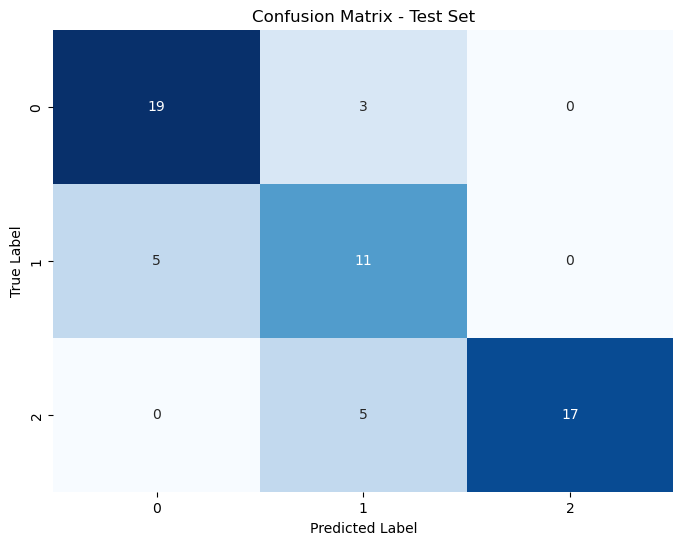

In [37]:
# Training the KNN model
knn_clf = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors to experiment
knn_clf.fit(X_train, y_train)

# Evaluating the model on the training set
y_train_pred = knn_clf.predict(X_train)
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report - Training Set:\n", classification_report(y_train, y_train_pred))

# Evaluating the model on the test set
y_test_pred = knn_clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report - Test Set:\n", classification_report(y_test, y_test_pred))

# Plotting a confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.65      0.81      0.72        16
           2       0.95      0.82      0.88        22

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.85      0.83      0.84        60

Confusion Matrix:
[[19  3  0]
 [ 2 13  1]
 [ 0  4 18]]


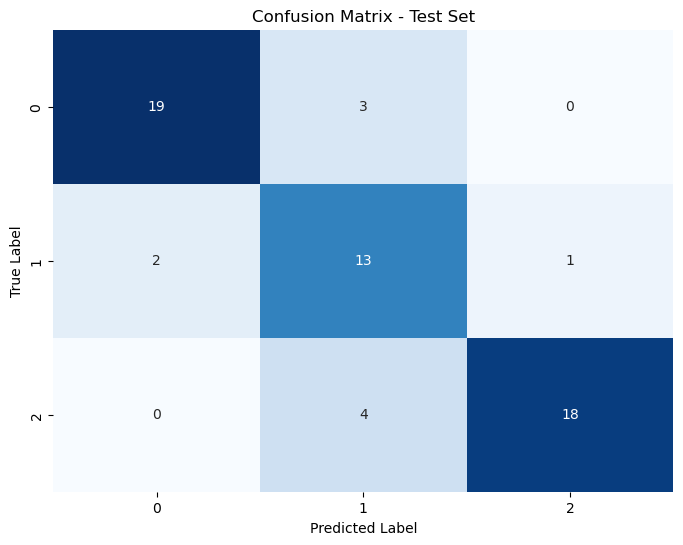

In [38]:
# Implement a Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, max_depth=24, random_state=40)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

conf_matrix_test = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


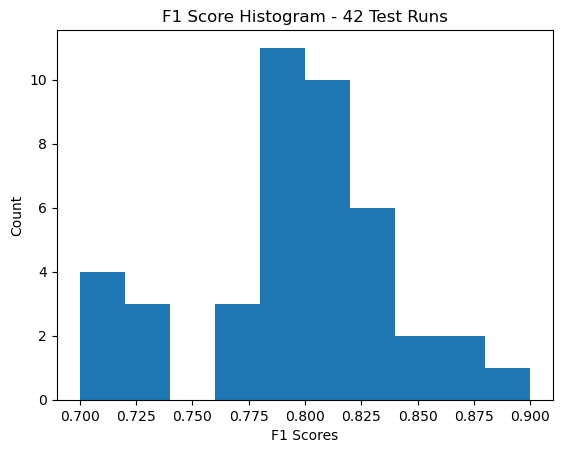

In [39]:
accuracy_scores = []
for i in range (1, 43):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    clf = RandomForestClassifier(n_estimators=100, max_depth=24, random_state=i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # print("random state:",i)
    # print(f"Accuracy: {accuracy:.2f}")
    accuracy_scores.append(accuracy)

plt.hist(accuracy_scores)
plt.title('F1 Score Histogram - 42 Test Runs')
plt.xlabel('F1 Scores')
plt.ylabel('Count')
plt.show()

In [40]:
accuracy_sum = 0
accuracy_ct = 0
for score in accuracy_scores:
    accuracy_sum += score
    accuracy_ct += 1
meaniac = accuracy_sum / accuracy_ct
sorted_accuracies = sorted(accuracy_scores)
halfway = len(sorted_accuracies) // 2
median = sorted_accuracies[halfway]
print(meaniac)
print(median)

0.7944444444444448
0.8


## Feature Importances

In [42]:
from sklearn.inspection import permutation_importance
import time

start_time = time.time()
result = permutation_importance(
    clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 3.140 seconds


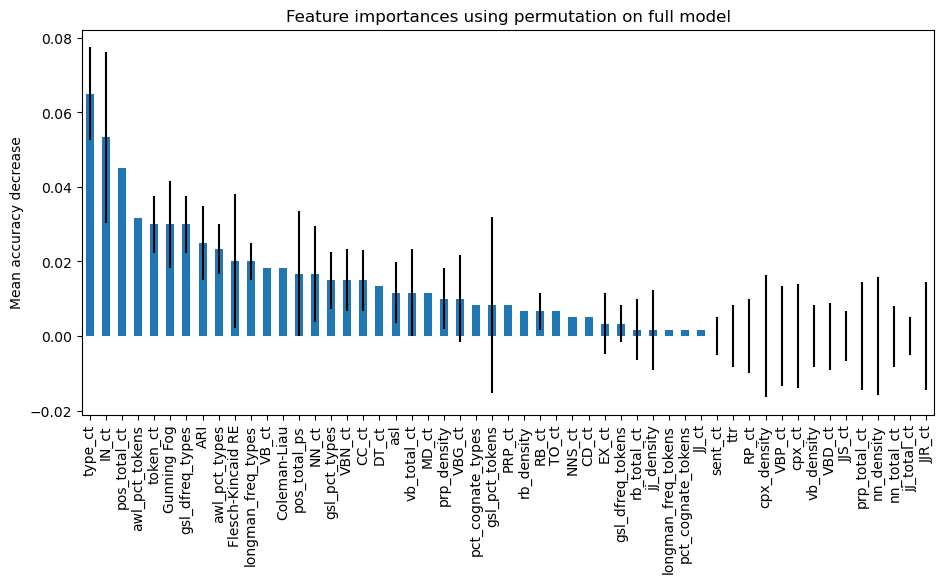

In [43]:
sorted_forest_importances = forest_importances.sort_values(ascending=False)
plot_series = sorted_forest_importances
fig, ax = plt.subplots(figsize=(11, 5))
plot_series.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
# fig.tight_layout()
plt.show()

## Save the Trained Model

In [45]:
import joblib
joblib.dump(clf, "./classifier_v4.joblib")

['./classifier_v4.joblib']

Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        22
           1       0.64      0.88      0.74        16
           2       1.00      0.77      0.87        22

    accuracy                           0.83        60
   macro avg       0.85      0.84      0.83        60
weighted avg       0.87      0.83      0.84        60

Confusion Matrix:
[[19  3  0]
 [ 2 14  0]
 [ 0  5 17]]


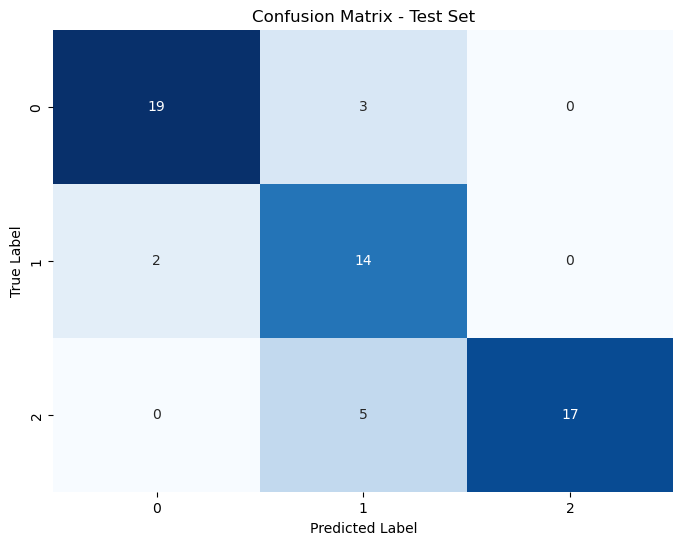

In [46]:
# Verify that the predictions are the same using the saved and reloaded model

loaded_clf = joblib.load("./classifier_v4.joblib")

y_pred = loaded_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

conf_matrix_test = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()